# Carga de Textos

## Ficheros

In [109]:
import pickle
import json
import sqlite3
import pandas as pd
from pathlib import Path
from dataclasses import dataclass
from urllib.request import urlretrieve

In [4]:
p = Path("./data.txt")
f = open(p, 'w')
x = 1
x[3] = "hello"
f.close()

TypeError: ignored

In [8]:
with open(p, 'w') as f:
    f.write("hello world")

In [11]:
%%shell
ls -sh
echo "-----"
cat data.txt

total 8.0K
4.0K data.txt  4.0K sample_data
-----
hello world

In [12]:
with open(p, mode='w') as f:
    f.write("test")

In [13]:
%%shell
ls -sh
echo "-----"
cat data.txt

total 8.0K
4.0K data.txt  4.0K sample_data
-----
test

In [14]:
with open(p, mode='r') as f:
    print(f.read())

test


In [15]:
with open(p, mode='a') as f:
    f.write("\nbye")

In [29]:
%%shell
cat data.txt


new line
 test
 test

In [31]:
%%shell
[[ -f data.txt ]] && rm data.txt

In [40]:
with open(p, mode="w") as f:
    f.write("Hello world")

In [43]:
with open(p, mode="r+") as f:
    print(f.read())
    f.write("\ntest")
    print("=" * 20)
    f.seek(0)
    print(f.read())
    print("=" * 20)
    f.seek(0)
    print(f.read())

Hello world
test
test
Hello world
test
test
test
Hello world
test
test
test


In [47]:
with open(p, mode="w+") as f:
    f.write("Hello world")
    f.seek(0)
    print(f.read())

Hello world


In [48]:
%%shell
ls -sh

total 8.0K
4.0K data.txt  4.0K sample_data


In [50]:
with open(p, mode="r+") as f:
    print(f.read())
    f.seek(0)
    f.write("123")

Hello world


In [51]:
%%shell
cat data.txt

123lo world

In [52]:
with open(p, mode="wb") as f:
    f.write(b'hello')

In [53]:
%%shell
cat data.txt

hello

In [56]:
with open(p, mode="rb") as f:
    print(f.read()[0])

104


In [58]:
@dataclass
class Student:
    name: str
    age: int
    gender: str

In [59]:
pepe = Student(
    name="Pepe",
    age=25,
    gender="male"
)

In [61]:
pickle.dump?

In [62]:
with open("student.pkl", mode="wb") as f:
    pickle.dump(pepe, f)

In [63]:
%%shell
cat student.pkl

��F       �__main__��Student���)��}�(�name��Pepe��age�K�gender��male�ub.

In [64]:
with open("student.pkl", mode="rb") as f:
    obj = pickle.load(f)

In [65]:
obj

Student(name='Pepe', age=25, gender='male')

## JSON

- Diccionarios.
- Listas.
- Numeros.
- Bools.
- Strings.

In [74]:
%%writefile data.json
[{"name":"Pepe","age":25,"is_alive":true},{"name":"Maria","age":30,"is_alive":false}]

Overwriting data.json


In [75]:
!sudo apt install jq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
jq is already the newest version (1.6-2.1ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


In [76]:
!cat data.json | jq

[
  {
    "name": "Pepe",
    "age": 25,
    "is_alive": true
  },
  {
    "name": "Maria",
    "age": 30,
    "is_alive": false
  }
]


In [78]:
with open("data.json", mode="r") as f:
    data = json.load(f)

In [80]:
type(data)

list

In [82]:
type(data[0])

dict

In [83]:
data[0]["name"]

'Pepe'

In [86]:
x = {"hello": "hola", "bye": "adios", "metadata": "este, es, un ejemplo {\"hello\": \"bye\"}"}
with open("data.json", mode="w") as f:
    json.dump(x, f)

In [87]:
!cat data.json | jq

{
  "hello": "hola",
  "bye": "adios",
  "metadata": "este, es, un ejemplo {\"hello\": \"bye\"}"
}


## SQL

In [90]:
conn = sqlite3.connect("data.db")

In [92]:
cur = conn.execute("""
CREATE TABLE people (
    id INT PRIMARY KEY,
    name TEXT,
    age INT,
    desc TEXT
);
"""
)

In [93]:
%%shell
ls -sh

total 28K
 12K data.db  4.0K data.json  4.0K data.txt  4.0K sample_data  4.0K student.pkl


In [101]:
df = (
    pd.DataFrame(data=[
        ("Pedro", 30, "Estudiante doctoral en la Universidad Pollito"),
        ("Maria", 25, "Estudiante de pregrado en la Universidad Pollito"),
        ("Josefa", 65, "Duena de negocio textil")
        ], columns=["name", "age", "desc"])
    .reset_index()
    .rename(columns={"index": "id"})
    .set_index("id")
)

In [102]:
df

,name,age,desc
id,,,
0,Pedro,30,Estudiante doctoral en la Universidad Pollito
1,Maria,25,Estudiante de pregrado en la Universidad Pollito
2,Josefa,65,Duena de negocio textil


In [103]:
df.to_sql(name="people", con=conn, if_exists="append")

3

In [107]:
df = pd.read_sql(
    sql="SELECT * FROM people",
    con=conn
).set_index("id")

In [108]:
df

,name,age,desc
id,,,
0,Pedro,30,Estudiante doctoral en la Universidad Pollito
1,Maria,25,Estudiante de pregrado en la Universidad Pollito
2,Josefa,65,Duena de negocio textil


# Adquisicion de Textos

## PDF

In [110]:
urlretrieve(
    url="https://www.exteriores.gob.es/documents/fichaspais/colombia_ficha%20pais.pdf",
    filename="data.pdf"
)

('data.pdf', <http.client.HTTPMessage at 0x7ee4eaf26500>)

In [112]:
with open("data.pdf", mode="rb") as f:
    data = f.read()

In [129]:
print(data[:1000])

b'%PDF-1.4\r%\xe2\xe3\xcf\xd3\r\n915 0 obj\r<</Linearized 1/L 753671/O 917/E 351899/N 12/T 735255/H [ 1616 717]>>\rendobj\r            \rxref\r\n915 66\r\n0000000016 00000 n\r\n0000002532 00000 n\r\n0000002691 00000 n\r\n0000004715 00000 n\r\n0000005482 00000 n\r\n0000006297 00000 n\r\n0000006880 00000 n\r\n0000007191 00000 n\r\n0000007759 00000 n\r\n0000008519 00000 n\r\n0000009260 00000 n\r\n0000009309 00000 n\r\n0000009423 00000 n\r\n0000009535 00000 n\r\n0000010181 00000 n\r\n0000010533 00000 n\r\n0000010901 00000 n\r\n0000010990 00000 n\r\n0000049306 00000 n\r\n0000089232 00000 n\r\n0000125808 00000 n\r\n0000163858 00000 n\r\n0000163943 00000 n\r\n0000164636 00000 n\r\n0000165268 00000 n\r\n0000165884 00000 n\r\n0000205826 00000 n\r\n0000240078 00000 n\r\n0000268513 00000 n\r\n0000297380 00000 n\r\n0000302043 00000 n\r\n0000307864 00000 n\r\n0000309361 00000 n\r\n0000309465 00000 n\r\n0000310794 00000 n\r\n0000311143 00000 n\r\n0000311528 00000 n\r\n0000313415 00000 n\r\n000031372

In [114]:
!pip install Pillow pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 66.1 MB/s eta 0:00:00


In [115]:
import fitz

In [116]:
pdf = fitz.open("data.pdf")

In [117]:
type(pdf)

fitz.fitz.Document

In [118]:
pdf

Document('data.pdf')

In [120]:
pdf.metadata

{'format': 'PDF 1.4',
 'title': '',
 'author': '',
 'subject': '',
 'keywords': '',
 'creator': 'Adobe InDesign 18.0 (Macintosh)',
 'producer': 'Adobe PDF Library 17.0',
 'creationDate': "D:20230417113621+02'00'",
 'modDate': "D:20230417113623+02'00'",
 'trapped': '',
 'encryption': None}

In [121]:
len(pdf)

12

In [122]:
page0 = pdf.load_page(0)

In [123]:
page0

page 0 of data.pdf

In [124]:
img = page0.get_pixmap()

In [125]:
img

Pixmap(DeviceRGB, IRect(0, 0, 596, 842), 0)

In [126]:
img.save("page0.png")

In [128]:
print(page0.get_text(option="text"))

Colombia
República de Colombia
OFICINA DE INFORMACIÓN DIPLOMÁTICA
FICHA PAÍS 
La Oficina de Información Diplomática del Ministerio de Asuntos Exteriores, Unión Europea y Cooperación pone a disposición de los profesionales de los 
medios de comunicación y del público en general la presente ficha país. La información contenida en esta ficha país es pública y se ha extraído de diversos 
medios, no defendiendo posición política alguna ni de este Ministerio ni del Gobierno de España respecto del país sobre el que versa. 
ABRIL 2023 
1. DATOS BÁSICOS
1.1. Características generales
Nombre Oficial: República de Colombia 
Superficie: 1.141.748 km².
Límites: Al norte con el mar de las Antillas, al este con Venezuela, Brasil, 
al oeste con el océano Pacífico, al noroeste con Panamá y al sur con Perú y 
Ecuador. 
Población: 51.050.000 hab. (estimaciones 2021) 
Capital: Bogotá (7.834.000 hab.)
Otras ciudades: 
Medellín: 2,6 millones habitantes 
Cali: 2,3 millones habitantes 
Barranquilla: 1,3 millo

In [131]:
display(page0.get_text(option="blocks"))

[(42.51969909667969,
  53.581790924072266,
  297.0596923828125,
  156.46279907226562,
  'Colombia\nRepública de Colombia\n',
  0,
  0),
 (42.51969909667969,
  40.24968719482422,
  227.7476806640625,
  63.859683990478516,
  'OFICINA DE INFORMACIÓN DIPLOMÁTICA\nFICHA PAÍS \n',
  1,
  0),
 (42.51969909667969,
  220.2099151611328,
  555.107421875,
  251.08990478515625,
  'La Oficina de Información Diplomática del Ministerio de Asuntos Exteriores, Unión Europea y Cooperación pone a disposición de los profesionales de los \nmedios de comunicación y del público en general la presente ficha país. La información contenida en esta ficha país es pública y se ha extraído de diversos \nmedios, no defendiendo posición política alguna ni de este Ministerio ni del Gobierno de España respecto del país sobre el que versa. \n',
  2,
  0),
 (44.50389862060547,
  260.58917236328125,
  90.4638900756836,
  269.86920166015625,
  'ABRIL 2023 \n',
  3,
  0),
 (42.72829818725586,
  705.126708984375,
  173.138275

In [132]:
page0.get_text("words")

[(42.51969909667969,
  53.581790924072266,
  297.0596923828125,
  131.97178649902344,
  'Colombia',
  0,
  0,
  0),
 (42.51969909667969,
  128.0467987060547,
  144.06370544433594,
  156.46279907226562,
  'República',
  0,
  1,
  0),
 (150.4237060546875,
  128.0467987060547,
  175.28770446777344,
  156.46279907226562,
  'de',
  0,
  1,
  1),
 (181.647705078125,
  128.0467987060547,
  275.6317138671875,
  156.46279907226562,
  'Colombia',
  0,
  1,
  2),
 (42.51969909667969,
  40.24968719482422,
  79.74970245361328,
  51.859683990478516,
  'OFICINA',
  1,
  0,
  0),
 (82.52970123291016,
  40.24968719482422,
  94.75969696044922,
  51.859683990478516,
  'DE',
  1,
  0,
  1),
 (97.5396957397461,
  40.24968719482422,
  163.65968322753906,
  51.859683990478516,
  'INFORMACIÓN',
  1,
  0,
  2),
 (166.43968200683594,
  40.24968719482422,
  227.7476806640625,
  51.859683990478516,
  'DIPLOMÁTICA',
  1,
  0,
  3),
 (42.51969909667969,
  52.24968719482422,
  70.29969787597656,
  63.859683990478516

In [134]:
html = page0.get_text("html")

In [135]:
from IPython.display import HTML

In [136]:
HTML(data=html)

In [137]:
pdf

Document('data.pdf')

In [138]:
texts = map(lambda page: page.get_text("text"), pdf)
all_text = "\n".join(texts)

In [139]:
len(all_text)

58908

In [140]:
print(all_text[:1000])

Colombia
República de Colombia
OFICINA DE INFORMACIÓN DIPLOMÁTICA
FICHA PAÍS 
La Oficina de Información Diplomática del Ministerio de Asuntos Exteriores, Unión Europea y Cooperación pone a disposición de los profesionales de los 
medios de comunicación y del público en general la presente ficha país. La información contenida en esta ficha país es pública y se ha extraído de diversos 
medios, no defendiendo posición política alguna ni de este Ministerio ni del Gobierno de España respecto del país sobre el que versa. 
ABRIL 2023 
1. DATOS BÁSICOS
1.1. Características generales
Nombre Oficial: República de Colombia 
Superficie: 1.141.748 km².
Límites: Al norte con el mar de las Antillas, al este con Venezuela, Brasil, 
al oeste con el océano Pacífico, al noroeste con Panamá y al sur con Perú y 
Ecuador. 
Población: 51.050.000 hab. (estimaciones 2021) 
Capital: Bogotá (7.834.000 hab.)
Otras ciudades: 
Medellín: 2,6 millones habitantes 
Cali: 2,3 millones habitantes 
Barranquilla: 1,3 millo

## OCR

In [141]:
%%shell
cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.2 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.2 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [142]:
!apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 17 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,488 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120918 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [143]:
!apt install tesseract-ocr-spa

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-spa
0 upgraded, 1 newly installed, 0 to remove and 17 not upgraded.
Need to get 951 kB of archives.
After this operation, 2,309 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-spa all 1:4.00~git30-7274cfa-1.1 [951 kB]
Fetched 951 kB in 1s (1,646 kB/s)
Selecting previously unselected package tesseract-ocr-spa.
(Reading database ... 120965 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-spa_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-spa (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-spa (1:4.00~git30-7274cfa-1.1) ...


In [144]:
!pip install pytesseract

In [155]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

In [146]:
!wget 'https://akifrases.com/frases-imagenes/frase-despues-de-todo-todo-ha-sido-nada-a-pesar-de-que-un-dia-lo-fue-todo-despues-de-nada-o-jose-hierro-190406.jpg' -O img.jpg

--2023-09-16 00:53:36--  https://akifrases.com/frases-imagenes/frase-despues-de-todo-todo-ha-sido-nada-a-pesar-de-que-un-dia-lo-fue-todo-despues-de-nada-o-jose-hierro-190406.jpg
Resolving akifrases.com (akifrases.com)... 172.67.213.162, 104.21.16.150, 2606:4700:3030::ac43:d5a2, ...
Connecting to akifrases.com (akifrases.com)|172.67.213.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70085 (68K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>]  68.44K  --.-KB/s    in 0.006s  

2023-09-16 00:53:36 (11.6 MB/s) - ‘img.jpg’ saved [70085/70085]



In [151]:
img = cv2.cvtColor(
    cv2.imread("img.jpg"),
    cv2.COLOR_BGR2RGB
    )

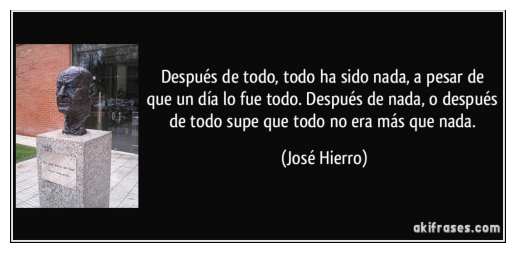

In [154]:
fig, ax = plt.subplots()
ax.imshow(img)
ax.axis("off");

In [156]:
text = pytesseract.image_to_string(img, lang="spa")
print(text)

Después de todo, todo ha sido nada, a pesar de
que un día lo fue todo. Después de nada, o después
RR MENA

(José Hierro)

 

akifrases.com



## Web Scraping

In [157]:
import requests

In [158]:
r = requests.get("https://es.wikipedia.org/wiki/Fernando_Botero")

In [159]:
r.status_code

200

In [160]:
data = r.text

In [161]:
data

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Fernando Botero - Wikipedia, la enciclopedia libre</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design

In [162]:
HTML(data=data)

In [163]:
from bs4 import BeautifulSoup

In [164]:
soup = BeautifulSoup(data)

In [165]:
soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" dir="ltr" lang="es">
<head>
<meta charset="utf-8"/>
<title>Fernando Botero - Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disa

In [167]:
print(soup.get_text())




Fernando Botero - Wikipedia, la enciclopedia libre




































Ir al contenido







Menú principal





Menú principal
mover a la barra lateral
ocultar



		Navegación
	


PortadaPortal de la comunidadActualidadCambios recientesPáginas nuevasPágina aleatoriaAyudaDonacionesNotificar un error





Idiomas

Los enlaces de idiomas se encuentran en la parte superior de la página, frente al título.



















Buscar











Buscar








Crear una cuentaAcceder






Herramientas personales





 Crear una cuenta Acceder





		Páginas para editores desconectados más información



ContribucionesDiscusión



























Contenidos
mover a la barra lateral
ocultar




Inicio





1Primeros años



Alternar subsección Primeros años





1.1Ciudad de Bogotá







1.2Formación en Europa







1.3Regreso a Colombia y viaje a México







1.4Botero y las vanguardias de Nueva York









2Fama







3Estilo y técnicas







4Donaciones de 

In [168]:
soup.find_all("h1")

[<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">Fernando Botero</span></h1>]

In [169]:
soup.find_all("h2")

[<h2 class="vector-pinnable-header-label">Contenidos</h2>,
 <h2><span id="Primeros_a.C3.B1os"></span><span class="mw-headline" id="Primeros_años">Primeros años</span></h2>,
 <h2><span class="mw-headline" id="Fama">Fama</span></h2>,
 <h2><span id="Estilo_y_t.C3.A9cnicas"></span><span class="mw-headline" id="Estilo_y_técnicas">Estilo y técnicas</span></h2>,
 <h2><span class="mw-headline" id="Donaciones_de_Botero">Donaciones de Botero</span></h2>,
 <h2><span class="mw-headline" id="Vida_personal">Vida personal</span></h2>,
 <h2><span id="Exposiciones_p.C3.BAblicas_y_permanentes_en_el_mundo"></span><span class="mw-headline" id="Exposiciones_públicas_y_permanentes_en_el_mundo">Exposiciones públicas y permanentes en el mundo</span></h2>,
 <h2><span id="V.C3.A9ase_tambi.C3.A9n"></span><span class="mw-headline" id="Véase_también">Véase también</span></h2>,
 <h2><span class="mw-headline" id="Referencias">Referencias</span></h2>,
 <h2><span id="Bibliograf.C3.ADa"></span><span class="mw-headline"

In [172]:
print(soup.find(id="bodyContent").get_text())






De Wikipedia, la enciclopedia libre






Este artículo se refiere o está relacionado con un fallecimiento reciente. La información de este artículo puede cambiar frecuentemente. Por favor, no agregues datos especulativos y recuerda colocar referencias a fuentes fiables para dar más detalles.Esta página debe seguir rigurosamente la política sobre biografías de personas vivas.


Fernando Botero
Fernando Botero Angulo en 2018.Información personalNombre de nacimiento
Fernando Botero AnguloNacimiento
19 de abril de 1932Medellín, ColombiaFallecimiento
15 de septiembre de 2023 (91 años)MónacoCausa de muerte
Neumonía Nacionalidad
ColombianaFamiliaPadres
David Botero yFlora AnguloCónyuge
Gloria Zea (1955-1960)Sophia Vari (1978-2023) Hijos
Fernando Botero ZeaLina Botero ZeaJuan Carlos Botero ZeaPedro Botero ZambranoEducaciónEducado en
Universidad Nacional de ColombiaReal Academia de Bellas Artes de San Fernando Información profesionalÁrea
Muralista, escultor, pintor, dibujanteAños activo
1

In [173]:
!apt update && apt install chromium chromium-driver

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [993 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,235 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [966 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,257 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/g

In [174]:
soup.find(class_="mw-page-container")

<div class="mw-page-container">
<div class="mw-page-container-inner">
<div class="vector-main-menu-container">
<div id="mw-navigation">
<nav aria-label="Sitio" class="vector-main-menu-landmark" id="mw-panel" role="navigation">
<div class="vector-pinned-container" id="vector-main-menu-pinned-container">
</div>
</nav>
</div>
</div>
<div class="vector-sitenotice-container">
<div id="siteNotice"><!-- CentralNotice --></div>
</div>
<input class="vector-menu-checkbox" id="vector-toc-collapsed-checkbox" type="checkbox"/>
<nav aria-label="Contenidos" class="mw-table-of-contents-container vector-toc-landmark vector-sticky-pinned-container" data-event-name="ui.sidebar-toc" id="mw-panel-toc" role="navigation">
<div class="vector-pinned-container" id="vector-toc-pinned-container">
<div class="vector-toc vector-pinnable-element" id="vector-toc">
<div class="vector-pinnable-header vector-toc-pinnable-header vector-pinnable-header-pinned" data-feature-name="toc-pinned" data-pinnable-element-id="vecto